<a class="anchor" id="section-0"></a>
<img src="https://i.imgur.com/lTCPbz0.jpeg" alt='logo puc-sp' width='30%' align='left'>

### Pontifícia Universidade Católica de São Paulo (PUC-SP)

<h1 style=font-size:30px>Exercícios Otimização e Simulação</h1>


### Bacharelado em Ciência de Dados e Inteligência Artificial

#### Turma: CDIA21-MA

**Aluno:** Lucas Lopes Amorim

**Professor:** Dr. Rooney Coelho

Resolva os problemas utilizando uma ferramenta computacional à sua escolha.

In [8]:
# Importando pulp como solver
import pulp as pl
import numpy as np
import pandas as pd
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')

## Exercício 1

Encontre $x_1$ e $x_2$ de forma a

**Maximizar:**

$Z = 3x_1 + 6x_2$

**Sujeito a:**

$9x_1+8x_2\leq72$

$x_2\leq6$

$-5x_1+4x_2\leq20$

$2x_1-4x_2\leq20$

$x_1,x_2\geq0$

**Resposta:**

$x_1=2.67, \,x_2=6,\,Z=44$

In [2]:
# Criando modelo
model = pl.LpProblem('Ex1', pl.LpMaximize)

# Criando variáveis
x1 = pl.LpVariable('x1', lowBound=0, cat='Continuous')
x2 = pl.LpVariable('x2', lowBound=0, upBound=6, cat='Continuous')


In [3]:
# Adicionando restrições ao modelo
model += 9*x1 + 8*x2 <= 72
model += -5*x1 + 4*x2 <= 20
model += 2*x1 -4*x2 <= 20

In [4]:
# Adicionando Função Objetiva
model += 3*x1 + 6*x2

In [5]:
model.solve()

1

In [28]:
model.objective.value()

37.6470592

In [7]:
for v in model.variables():
    print( v.name, '=', v.varValue )

x1 = 2.6666667
x2 = 6.0


## Exercício 2

Encontre $x_1$ e $x_2$ de forma a

**Maximizar:**

$Z = 10x_1 + 2x_2$

**Sujeito a:**

$10x_1+4x_2\leq40$

$8x_1+2x_2\geq0$

$x_2\leq6$

$x_1-3x_2\leq0$

$x_1,\,x_2\geq0$

**Resposta:**

$x_1 = 3.53,\,x_2=1.18,\,Z=37.65$


In [18]:
# Criando modelo
model = pl.LpProblem('Ex2', pl.LpMaximize)

# Criando variáveis
x1 = pl.LpVariable('x1', lowBound=0, cat='Continuous')
x2 = pl.LpVariable('x2', lowBound=0, upBound=6, cat='Continuous')

In [19]:
# Adicionando restrições ao modelo
model += 10*x1 + 4*x2 <= 40
model += 8*x1 + 2*x2 >= 0
model += x1 - 3*x2 <= 0

In [20]:
# Adicionando função objetivo
model += 10*x1 + 2*x2

In [21]:
# Encontrando solução
model.solve()

1

In [27]:
model.objective.value()

37.6470592

In [15]:
for v in model.variables():
    print( v.name, '=', v.varValue )

x1 = 3.5294118
x2 = 1.1764706


## Exercício 3

**Maximizar**: Lucro

**Variáveis**:

$x_1 =$ nº de peças do tipo *Standard*

$x_2 =$  nº de peças do tipo *Luxo*

**Restrições:**

Tempo total de lixação

$2x_1+2x_2<=80$

Tempo total de polimento

$x_1+3x_2 <=120$

$x_1,\,x_2 >= 0$

**Função Objetivo:**

$L = 24x_1 + 32x_2$

**Resposta:**

$x_1=0,\,x_2=40,\,L=1,280.00$

In [29]:
# Criando modelo
model = pl.LpProblem('Ex3', pl.LpMaximize)

# Criando variáveis
x1 = pl.LpVariable('x1', lowBound=0, cat='Integer')
x2 = pl.LpVariable('x2', lowBound=0, cat='Integer')

In [30]:
# Adicionando restrições
model += 2*x1 + 2*x2 <= 80
model += x1 + 3*x2 <= 120

In [31]:
# Adicionando função objetivo
model += 24*x1 + 32*x2

In [32]:
# Encontrando solução
model.solve()

1

In [40]:
# Encontrando valor da função objetivo
model.objective.value()

1280.0

In [39]:
for v in model.variables():
    print(f'{v.name} = {v.varValue}')

x1 = 0.0
x2 = 40.0


## Exercício 4
**Maximizar:** Lucro

**Variáveis**:

$x_1 =$ nº hectares de milho

$x_2 =$ nº hectares de trigo

$x_3 =$ nº hectares de soja

**Restrições:**

Área cultivável

$x_1+x_2+x_3 <= 400$

Custos preparação do terreno

$200x_1+240x_2+140x_3 <= 80,000$

Disponibilidade de mão de obra

$10x_1+16x_2+12x_3 <= 6,000$

Não poderão haver nº de hectares negativos

$x_1,\,x_2,\,x_3 >= 0$

**Função Objetivo:**

$L = 600x_1 + 700x_2 + 550x_3$

**Resposta:**

$x_1 = 0\,\text{ha},\,x_2 = 240\,\text{ha},\,x_3 = 160\,\text{ha}\\L=256,000.00$

In [41]:
# Criando modelo
model = pl.LpProblem('Ex4', pl.LpMaximize)

# Criando variáveis
x1 = pl.LpVariable('x1', lowBound=0, cat='Integer')
x2 = pl.LpVariable('x2', lowBound=0, cat='Integer')
x3 = pl.LpVariable('x3', lowBound=0, cat='Integer')

In [42]:
# Adicionando restrições
model += x1 + x2 + x3 <= 400
model += 200*x1 + 240*x2 + 140*x3 <= 80000
model += 10*x1 + 16*x2 + 12*x3 <= 6000

In [43]:
# Adicionando função objetivo
model += 600*x1 + 700*x2 + 550*x3

In [44]:
# Encontrando solução
model.solve()

1

In [45]:
# Encontrando valor da função objetivo
model.objective.value()

256000.0

In [48]:
for v in model.variables():
    print(f'{v.name} = {v.varValue}')

x1 = 0.0
x2 = 240.0
x3 = 160.0


## Exercício 5

Encontre $x_1,x_3,x_3$ pelo método Simplex

**Maximizar:**

$\Large L = 8x_1 + 10x_2 + 6x_3$

**Sujeito a:**

$\Large x_1 + x_3 \leq 400$

$\Large 4x_1 + 4x_2 + 2x_3 \leq 1200$

$\Large 3x_1 + 3x_2 \leq 600$

$\Large x_1,x_2,x_3 \geq 0$

Vamos resolver esse problema utilizando a função $\text{Simplex}$ fornecida pelo professor

In [1]:
def Simplex(T, rotulos=[], base=[]):
    '''
    Função para calcular o Tableau Simplex apresentando a sua evolução ao longo das iterações.
    
    Argumentos de entrada:
        T: numpy array representando o Tableau inicial
    
    Argumentos de Saída
        T: a tabela na última iteração do algoritmo
        
    Programador: Prof. Dr. Rooney Coelho
    '''
    
    print('Tableu Simplex (inicial):')
    if rotulos == [] and base == []:
        print(T)
    else:
        print( pd.DataFrame(T, columns=rotulos, index=base ) )
    
    menor = -1
    it = 0
    while menor < 0:
        # Inicialização dos parâmetros (sobreescrever)
        pivo_linha = -1
        pivo_coluna = -1
        pivo = 0
        menor = T[0,:-1].min()

        if menor >=0:
            print('\nNenhum dos coeficientes da linha z associados com as variáveis não básicas é negativo assim essa tabela é ótima!')
            break
        else:
            it += 1
            print(f'\nIteração: {it}')
            # pega o menor elemento da primeira linha (função objetivo)
            pivo_coluna = T[0,:-1].argmin()

            aux = np.zeros(len(T)-1)
            i = 0
            for a,b in zip(T[1:,-1],T[1:,pivo_coluna]):
                aux[i] = a/b
                i+=1

            val = aux[aux>0].min()
            pivo_linha = np.argwhere(aux==val).item() + 1 # Soma um para a mesma referencia incluindo objetivo
            pivo = T[pivo_linha, pivo_coluna]
            print(f'Linha do pivô: {pivo_linha}, Coluna do pivô: {pivo_coluna}, Elemento pivô: {pivo}\n')

            # Nova linha do pivô = linha do pivô atual / elemento do pivô
            T[pivo_linha] = T[pivo_linha]/pivo 

            # Todas as outras linhas, incluindo z
            # Nova linha=(Linha atual)−(seu coeficiente de coluna do pivô)×(Nova linha do pivô)

            nova_linha_pivo = T[pivo_linha]

            for i in range(len(T)):
                if i != pivo_linha:
                    T[i] -= T[i,pivo_coluna]*nova_linha_pivo

            print('Tableu Simplex:')
            if rotulos == [] and base == []:
                print(T)
            else:
                base[pivo_linha] = rotulos[pivo_coluna]
                print( pd.DataFrame(T, columns=rotulos, index=base ) )
    return T

In [10]:
T = np.array([
    [1,-8,-10,-6,0,0,0,0],
    [0,1,0,1,1,0,0,400],
    [0,4,4,2,0,1,0,1200],
    [0,3,3,0,0,0,1,600]
], dtype=float)

rotulos = ['z', 'x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'LD' ]
base = ['z', 'x4', 'x5', 'x6']

Simplex(T, rotulos, base);

Tableu Simplex (inicial):
      z   x1    x2   x3   x4   x5   x6      LD
z   1.0 -8.0 -10.0 -6.0  0.0  0.0  0.0     0.0
x4  0.0  1.0   0.0  1.0  1.0  0.0  0.0   400.0
x5  0.0  4.0   4.0  2.0  0.0  1.0  0.0  1200.0
x6  0.0  3.0   3.0  0.0  0.0  0.0  1.0   600.0

Iteração: 1
Linha do pivô: 3, Coluna do pivô: 2, Elemento pivô: 3.0

Tableu Simplex:
      z   x1   x2   x3   x4   x5        x6      LD
z   1.0  2.0  0.0 -6.0  0.0  0.0  3.333333  2000.0
x4  0.0  1.0  0.0  1.0  1.0  0.0  0.000000   400.0
x5  0.0  0.0  0.0  2.0  0.0  1.0 -1.333333   400.0
x2  0.0  1.0  1.0  0.0  0.0  0.0  0.333333   200.0

Iteração: 2
Linha do pivô: 2, Coluna do pivô: 3, Elemento pivô: 2.0

Tableu Simplex:
      z   x1   x2   x3   x4   x5        x6      LD
z   1.0  2.0  0.0  0.0  0.0  3.0 -0.666667  3200.0
x4  0.0  1.0  0.0  0.0  1.0 -0.5  0.666667   200.0
x3  0.0  0.0  0.0  1.0  0.0  0.5 -0.666667   200.0
x2  0.0  1.0  1.0  0.0  0.0  0.0  0.333333   200.0

Iteração: 3
Linha do pivô: 1, Coluna do pivô: 6, Element

## Exercício 6

Resolva o seguinte problema pelo método das duas fases

**Minimizar**

$\Large Z = 4x_1 + 2x_2$

**Sujeito a:**

$\Large 4x_1 + 3x_2 \geq 6$

$\Large 6x_1 + 2x_2 = 6$

$\Large 2x_1 + 4x_2 \leq 6$

$\Large x_1,x_2 \geq 0$

Minimize $r = R_1 + R_2$

$4x_1 + 3x_2 - x_3 + R_1 = 6$

$6x_1 + 2x_2 + R_2 = 6$

$2x_1 + 4x_2 + x_4 = 6$

$x_1,x_2,x_3,x_4,R_1,R_2 \geq 0$

**1° fase:**

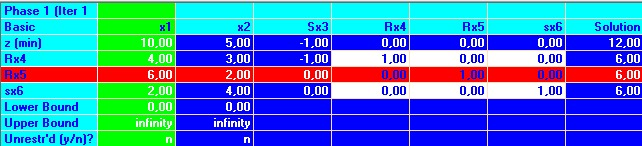

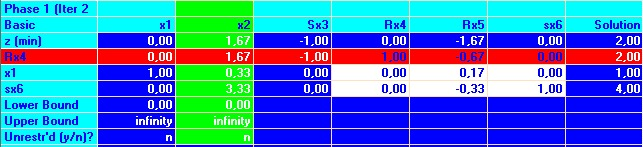

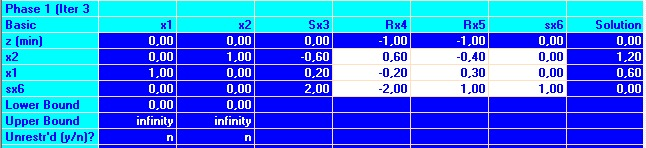

Variáveis fora da base: $sx6=0,Rx4=0,Rx5=0$

**2° fase:**

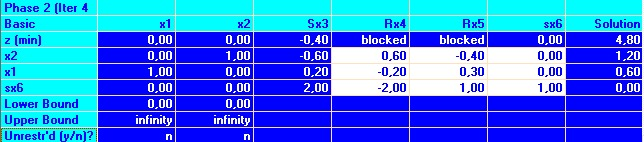

Variáveis fora da base: $s𝑥6=0$

Variáveis na base: $ 𝑥1=3/5 \ (0,6)\ ,𝑥2=6/5 \ (1,2)\ , S𝑥3=0 \ e \ 𝑍=24/5 \ (4,80)$

## Exercício 7

Encontre o problema dual

Minimizar

$\Large Z = 10x_1 + 6x_2 - 2y_3$

Sujeito a:

$\Large2x_1 + 2x_2 + 2x_3 = 10$

$\Large-2x_1 - x_2 - 3y_3 \geq -10$

$\Large 2x_1 - 4x_2 + 2x_3 \geq 4$

$\Large x_1,x_2,x_3 \geq 0$

O problema de minimização de programação linear corresponde um problema de maximização no Problema Dual.

Transformando os termos constantes das restrições do Primal nos coeficientes da função-objetivo do Dual.

$\Large D = 10y_1 − 10𝑦_2 + 4𝑦_3$


Invertendo a matriz dos coeficientes do Primal para as novas restrições do Dual

<center><b>Primal → Dual</b></center>

$$\Large\begin{bmatrix} 2 & 2 & 2 \\ -2 & -1 & -3 \\ 2 & -4 & 2 \end{bmatrix} \rightarrow \begin{bmatrix} 2 & -2 & 2 \\ 2 & -1 & -4 \\ 2 & -3 & -2 \end{bmatrix}$$

Transformando os coeficientes da função-objetivo do Dual nos termos constantes das restrições do Primal.

Logo temos o problema Dual:

**Maximizar:**

$ \Large D = 10y_1 − 10𝑦_2 + 4𝑦_3$

**Sujeito a:**

$ \Large 2y_1 − 2y_2 + 2y_3 \leq 10 $

$ \Large 2y_1 − y_2 - 4y_3 \leq 6 $

$ \Large 2y_1 − 3y_2 + 2y_3 \leq -2 $

$ \Large y_2, y_3 \geq 0$

## Exercício 8

**Variáveis**

$x_1 =$  **qtd(Kg)** de **carne** de porco na salsicha **econômica**

$x_2 =$ **qtd(Kg)** de **carne** de porco na salsicha **premium**

$x_3 =$ **qtd(Kg)** de **farinha** de trigo na salsicha **econômica**

$x_4 =$  **qtd(Kg)** de **farinha** de trigo na salsicha **premium**

$x_5 =$  **qtd(Kg)** de **amido** na salsicha **econômica**

$x_6 =$  **qtd(Kg)** de **amido** na salsicha **premium**

**Minimizar**: Custo total

**Restrições**

Composição ≥40% de carne de porco na salsicha econômica

$\Large\frac{x_1 \times 1000}{50 \times 350}\geq 0.4$

Composição ≥60% de carne de porco na salsicha premium

$\Large\frac{x_2 \times 1000}{50 \times 500}\geq 0.6$

Composição ≤25% de amido em cada uma das salsichas

$\Large\frac{x_5 \times 1000}{50 \times 350} \leq 0.25$

$\Large\frac{x_6 \times 1000}{50 \times 500} \leq 0.25$

Usar totalmente os 23 Kg de carne de porco já comprados

$\Large x_1 + x_2 \geq 23$

Disponibilidade de carne de porco

$\Large x_1 + x_2 \leq 30$

Disponibilidade de Farinha de trigo

$\Large x_3 + x_4 \leq 20$

Disponibilidade de Amido

$\Large x_5 + x_6 \leq 17$

A mistura dos ingredientes precisa resultar em salsichas de 50g

$\Large x_1 + x_3 + x_5 = \frac{350 \times 50}{1000}$

$\Large x_2 + x_4 + x_6 = \frac{500 \times 50}{1000}$

A quantidade de cada ingrediente não pode ser negativa

$\Large x_1,\,x_2,\,x_3,\,x_4,\,x_5,\,x_6 \geq 0$

**Função Objetivo**

$\Large C_1 = (29.03 \times x_1 + 16.53 \times x_3 + 12.50 \times x_5)$

$\Large C_2 = (29.03 \times x_2 + 16.53 \times x_4 + 12.50 \times x_6)$

$\Large C_\text{total} = C_1 + C_2$

**Resposta:**

$\Large x_1 = 8,\,x_2 = 15$

$\Large x_3=5.125,\,x_4=3.75$

$\Large x_5=4.375, \,x_6=6.25$

$\Large C_\text{total}=947.21$

In [102]:
# Criando modelo
model = pl.LpProblem('Ex8', pl.LpMinimize)

# Criando variáveis
x1 = pl.LpVariable('x1', lowBound=0, cat='Continuous')
x2 = pl.LpVariable('x2', lowBound=0, cat='Continuous')
x3 = pl.LpVariable('x3', lowBound=0, cat='Continuous')
x4 = pl.LpVariable('x4', lowBound=0, cat='Continuous')
x5 = pl.LpVariable('x5', lowBound=0, cat='Continuous')
x6 = pl.LpVariable('x6', lowBound=0, cat='Continuous')

In [103]:
# Adicionando restrições
model += (x1*1000)/(50*350) >= 0.4
model += (x2*1000)/(50*500) >= 0.6
model += (x5*1000)/(50*350) <= 0.25
model += (x6*1000)/(50*500) <= 0.25
model += x1 + x2 >= 23
model += x1 + x2 <= 30
model += x3 + x4 <= 20
model += x5 + x6 <= 17
model += x1 + x3 + x5 == (350*50)/1000
model += x2 + x4 + x6 == 500*50 /1000

In [104]:
# Adicionando função objetivo
model += ((29.03*x1+16.53*x3+12.50*x5)) + ((29.03*x2+16.53*x4+12.5*x6))

In [105]:
# Encontrando solução
model.solve()

1

In [106]:
model.objective.value()

947.20625

In [107]:
for v in model.variables():
    print(f'{v.name} = {v.varValue}')

x1 = 8.0
x2 = 15.0
x3 = 5.125
x4 = 3.75
x5 = 4.375
x6 = 6.25


In [110]:
# Primeira tentativa esqueci de colocar as restrições de disponibilidade dos ingredientes
# Na segunda tentativa esqueci de colocar as restrições do peso das salsichas
# Na terceira tentativa coloquei unidades de medidas incompatíveis nas restrições do peso das salsichas
# Na quarta tentativa percebi que minha fórmula da função objetivo estava errada
# Na quinta tentativa percebi que novamente minha fórmula da função objetivo estava errada

## Exercício 9
**Maximizar**: Lucro

**Variáveis**

$x_1 =$  **área**(Km²) de **Trigo** utilizada na produção

$x_2 =$  **área**(Km²) de **Arroz** utilizada na produção

$x_3 =$  **área**(Km²) de **Milho** utilizada na produção

**Restrições**

A área utilizada para produção não pode ser maior que a área disponível na fazenda

$\Large x_1 + x_2 + x_3 \leq 200$

O total produzido não pode ser maior que a capacidade de armazenagem

$\Large 1800x_1 + 2100x_2 + 2900x_3 \leq 700,000$

A área utilizada para a produção não pode ser negativa para nenhum dos produtos

$\Large x_1,\,x_2,\,x_3 \geq 0$

**Função Objetiva**

$\Large L = 1.2 \times 1800x_1 + 0.6 \times 2100x_2 + 0.28 \times 2900x_3$

**Resposta**

$\Large x_1= 200,\;x_2=0,\;x_3=0$

$\Large L=432,000.00$

In [127]:
# Criando modelo
model = pl.LpProblem('Ex9', pl.LpMaximize)

# Criando variáveis
x1 = pl.LpVariable('x1', lowBound=0, cat='Continuous')
x2 = pl.LpVariable('x2', lowBound=0, cat='Continuous')
x3 = pl.LpVariable('x3', lowBound=0, cat='Continuous')

In [128]:
# Adicionando restrições
model += x1 + x2 + x3 <= 200
model += 1800*x1 + 2100*x2 + 2900*x3 <= 700000

In [129]:
# Adicionando função objetiva
model += 1.2 * 1800*x1 + 0.6 * 2100 * x2 + 0.28 * 2900*x3

In [130]:
# Encontrando solução
model.solve()

1

In [131]:
model.objective.value()

432000.0

In [132]:
for v in model.variables():
    print(f'{v.name} = {v.varValue}')

x1 = 200.0
x2 = 0.0
x3 = 0.0


## Exercício 10

**Maximizar**: Lucro

$x_1 =$ quantidade(t) de fertilizante do tipo A

$x_2 =$ quantidade(t) de fertilizante do tipo B

$x_3 =$ quantidade(t) de fertilizante do tipo C

### Restrições

Produção Mínima fertilizante tipo A para atender contrato

$\Large x_1 \geq 6500$

Disponibilidade de Nitrato

$\Large 0.05x_1 + 0.05x_2 + 0.1x_3 \leq 1200$

Disponibilidade de Fosfato

$\Large 0.1x_1 + 0.1x_2 + 0.1x_3 \leq 2000$

Disponibilidade de Potássio

$\Large 0.05x_1 + 0.1x_2 + 0.1x_3 \leq 1400$

A quantidade produzida não pode ser negativa

$\Large x_1,\;x_2,\;x_3 \geq 0$

### **Função Objetivo**

$\large L_1 = 800 \times x_1 - (0.05x_1 \times 3000+0.1x_1 \times 1000 + 0.05x_1 \times 1800 + 0.8x_1 \times 200 + 300x_1)$

$\large L_2 = 960 \times x_2 - (0.05x_2 \times 3000 + 0.1x_2 \times 1000 + 0.1x_2 \times 1800 + 0.75x_2 \times 200 + 300x_2)$

$\large L_3 = 1100 \times x_3 - (0.1x_3 \times 3000 + 0.1x_3 \times 1000 + 0.1x_3 \times 1800 + 0.7x_3 \times 200 + 300x_3)$

$\Large L_\text{total}=L_1+L_2+L_3$

In [2]:
# Criando modelo
model = pl.LpProblem('Ex10', pl.LpMaximize)

# Criando variáveis
x1 = pl.LpVariable('x1', lowBound=0, cat='Continous')
x2 = pl.LpVariable('x2', lowBound=0, cat='Continous')
x3 = pl.LpVariable('x3', lowBound=0, cat='Continous')

In [3]:
# Adicionando restrições
model += x1 >= 6500
model += 0.05*x1 + 0.05*x2 + 0.1*x3 <= 1200
model += 0.1*x1 + 0.1*x2 + 0.1*x3 <= 2000
model += 0.05*x1 + 0.1*x2 + 0.1*x3 <= 1400

In [4]:
# Adicionando função objetivo
L1 = 800 * x1 - (0.05*x1*3000 + 0.1*x1*1000 + 0.05*x1*1800 + 0.8*x1*200 + 300*x1)
L2 = 960 * x2 - (0.05*x2*3000 + 0.1*x2*1000 + 0.1*x2*1800 + 0.75*x2*200 + 300*x2)
L3 = 1100 * x3 - (0.1*x3*3000 + 0.1*x3*1000 + 0.1*x3*1800 + 0.7*x3*200 + 300*x3)
model += L1 + L2 + L3

In [5]:
model.objective

0.0*x1 + 80.0*x2 + 80.0*x3 + 0.0

In [204]:
# Encontrando solução
model.solve()

1

In [205]:
# Encontrando lucro máximo
model.objective.value()

860000.0

In [206]:
for v in model.variables():
    print(f'{v.name} = {v.varValue}')

x1 = 6500.0
x2 = 4000.0
x3 = 6750.0


## Exercício 11

**Minimizar:** Custo

### Variáveis

$x_1 =$  **quantidade** de produtos **A** de produção **própria**

$x_2 =$  **quantidade** de produtos **B** de produção **própria**

$x_3 =$  **quantidade** de produtos **A** de produção **privatizada**

$x_4 =$  **quantidade** de produtos **B** de produção **privatizada**

### Restrições

A fábrica já se comprometeu a entregar 30000 produtos do tipo A

$\Large x_1 + x_3 \geq 30,000$

A fábrica já se comprometeu a entregar 15000 produtos do tipo B

$\Large x_2 + x_4 \geq 15,000$

Limite de horas na produção

$\Large 0.2x_1 + 0.4x_2 \leq 10,000$

Limite de horas na montagem

$\Large 0.3x_1 + 0.5x_2 \leq 15,000$

Limite de horas no teste de qualidade

$\Large 0.1x_1 + 0.1x_2 \leq 5,000$

A quantidade produzida de cada produto não pode ser negativa

$\Large x_1,\;x_2,\;x_3,\;x_4 \geq 0$

### Função objetivo

$\Large C = 55x_1 + 67x_2 + 85x_3 + 95x_4$

In [227]:
# Criando modelo
model = pl.LpProblem('Ex11', pl.LpMinimize)

# Criando variáveis
x1 = pl.LpVariable('x1', lowBound=0, cat='Integer')
x2 = pl.LpVariable('x2', lowBound=0, cat='Integer')
x3 = pl.LpVariable('x3', lowBound=0, cat='Integer')
x4 = pl.LpVariable('x4', lowBound=0, cat='Integer')

In [228]:
# Adicionando restrições ao modelo
model += x1 + x3 >= 30000
model += x2 + x4 >= 15000
model += 0.2*x1 + 0.4*x2 <= 10000
model += 0.3*x1 + 0.5*x2 <= 15000
model += 0.1*x1 + 0.1*x2 <= 5000

In [229]:
# Adicionando função objetivo ao modelo
model += 55*x1 + 67*x2 + 85*x3 + 95*x4

In [230]:
# Encontrando solução
model.solve()

1

In [231]:
# Encontrando custo mínimo
model.objective.value()

2795000.0

In [232]:
for v in model.variables():
    print(f'{v.name} = {v.varValue}')

x1 = 30000.0
x2 = 10000.0
x3 = 0.0
x4 = 5000.0


## Exercício 12

**Maximizar**: Lucro

### Variáveis

$x_1 =$ quantidade(Kg) de queijo

$x_2 =$ quantidade(Kg) de doce

$x_3 =$ quantidade(Kg) de ricota

### Restrições

A mão-de-obra demandada não pode ultrapassar a disponível

$\Large \frac{3x_1}{60} + \frac{2x_2}{60} + \frac{x_3}{60} \leq 12 \times 8$

O total de leite utilizado não pode ultrapassar o total disponível

$\Large 10x_1 + 6x_2 <= 8,000$

A quantidade de doce por dia não deve ultrapassar 200 kg

$\Large x_2 <= 200$

A quantidade de queijo deve ser no mínimo igual a 3 vezes a quantidade de doce

$\Large x_1 \geq 3x_2$

A quantidade de ricota produzida depende da quantidade de queijo produzida, já que essa é um subproduto deste

$\Large x_3 \leq \frac{x_1}{3}$

A quantidade produzida de cada um dos produtos não pode ser negativa

$\Large x_1,\;x_2,\;x_3 \geq 0$

### Função objetivo

$\Large L = 1.5x_1 +2x_2 + 1.2x_3$

**Resposta**

$x_1 = 680,\;x_2=200,\;x_3=226.66$

$L = 1692$

In [246]:
# Criando modelo
model = pl.LpProblem('Ex12', pl.LpMaximize)

# Criando variáveis
x1 = pl.LpVariable('x1', lowBound=0, cat='Continuous')
x2 = pl.LpVariable('x2', lowBound=0, upBound=200, cat='Continuous')
x3 = pl.LpVariable('x3', lowBound=0, cat='Continuous')

In [247]:
# Adicionando restrições
model += (3*x1) + (2*x2) + x3 <= 12*8*60
model += 10*x1 + 6*x2 <= 8000
model += x1 >= 3*x2
model += 3*x3 <= x1

In [248]:
# Adicionando função objetivo
model += 1.5*x1 + 2*x2 + 1.2*x3

In [249]:
# Encontrando solução
model.solve()

1

In [250]:
# Encontrando lucro máximo
model.objective.value()

1692.000004

In [251]:
for v in model.variables():
    print(f'{v.name} = {v.varValue}')

x1 = 680.0
x2 = 200.0
x3 = 226.66667
